In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
df_train = pd.read_csv('Customer-Churn-Records.csv')
df_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df_train.drop(columns=['RowNumber'], inplace=True)
df_train.drop(columns=['CustomerId'], inplace=True)

In [4]:
df_train.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Surname             10000 non-null  object 
 1   CreditScore         10000 non-null  int64  
 2   Geography           10000 non-null  object 
 3   Gender              10000 non-null  object 
 4   Age                 10000 non-null  int64  
 5   Tenure              10000 non-null  int64  
 6   Balance             10000 non-null  float64
 7   NumOfProducts       10000 non-null  int64  
 8   HasCrCard           10000 non-null  int64  
 9   IsActiveMember      10000 non-null  int64  
 10  EstimatedSalary     10000 non-null  float64
 11  Exited              10000 non-null  int64  
 12  Complain            10000 non-null  int64  
 13  Satisfaction Score  10000 non-null  int64  
 14  Card Type           10000 non-null  object 
 15  Point Earned        10000 non-null  int64  
dtypes: fl

In [6]:
df_train["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [7]:
df_train = pd.get_dummies(df_train, columns=["Gender"], drop_first=True)
df_train.head()

,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Gender_Male
0,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,False
1,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,False
2,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,False
3,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,False
4,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,False


In [8]:
df_train["Card Type"].value_counts()  

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

In [9]:
df_train["Card Type"] = df_train["Card Type"].replace({"SILVER ":0, "GOLD":1, "PLATINUM ":2,"DIAMOND":3})

In [10]:
df_train.head()

,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Gender_Male
0,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,1,2,3,464,False
1,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,3,3,456,False
2,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,1,3,3,377,False
3,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,0,5,1,350,False
4,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425,False


In [11]:
df_train.drop(columns=['Surname'], inplace=True)
df_tr = df_train.copy()
df_tr.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Gender_Male
0,619,France,42,2,0.00,1,1,1,101348.88,1,1,2,3,464,False
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,3,3,456,False
2,502,France,42,8,159660.80,3,1,0,113931.57,1,1,3,3,377,False
3,699,France,39,1,0.00,2,0,0,93826.63,0,0,5,1,350,False
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425,False


In [12]:
df_tr["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
correlation_matrix = df_tr.corr(numeric_only=True)
print("Korelasyon Matrisi:")
correlation_matrix

Korelasyon Matrisi:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515,-0.008112
Exited,-0.026771,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000,0.995693,-0.005849,-0.004628,-0.106267
Complain,-0.027048,0.283530,-0.013047,0.119124,-0.046357,-0.007095,-0.154741,0.012494,0.995693,1.000000,-0.004799,-0.002893,-0.106287


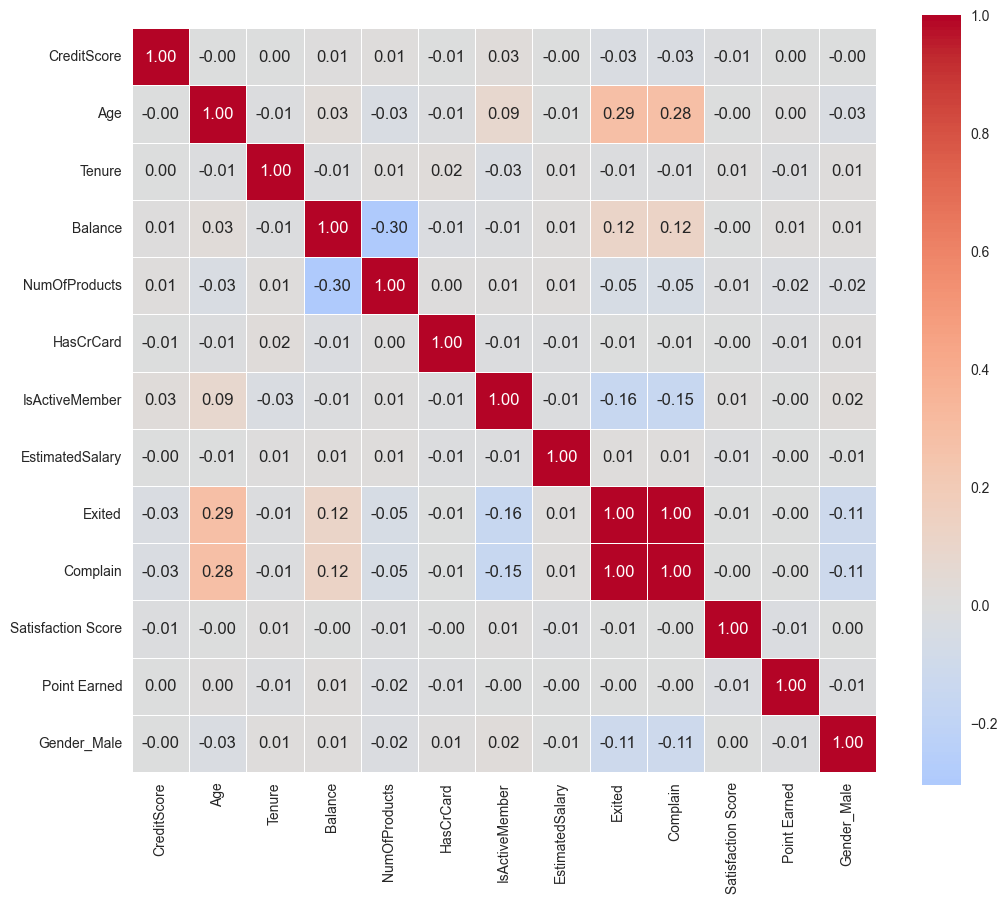

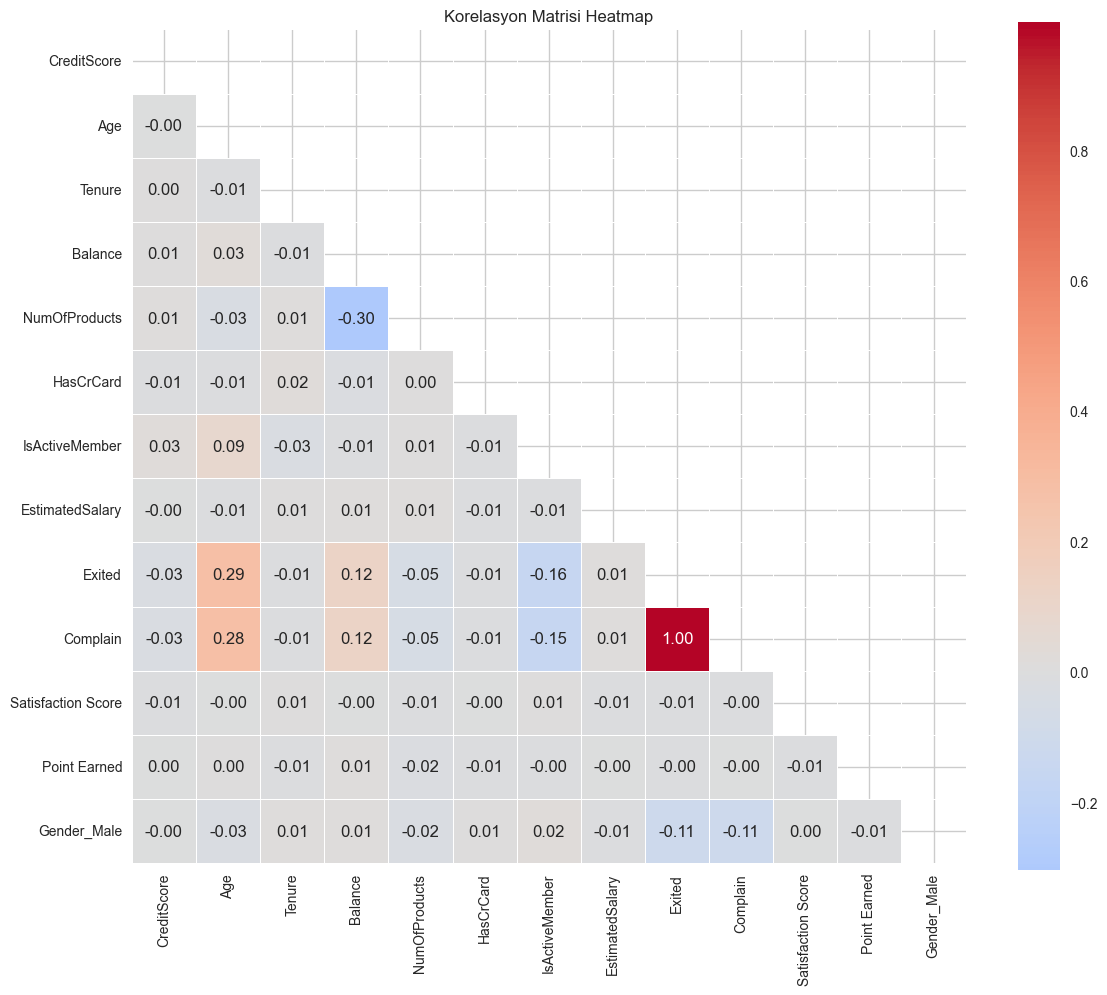

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.show()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            mask=mask,          
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True, 
            linewidths=0.5, 
            fmt='.2f')
plt.title('Korelasyon Matrisi Heatmap')
plt.tight_layout()
plt.show()

In [15]:
df_tr["Complain"].value_counts()

Complain
0    7956
1    2044
Name: count, dtype: int64

In [16]:
df_tr[(df_tr["Complain"] == 0) & (df_tr["Exited"] == 1 )]

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Gender_Male
16,653,Germany,58,1,132602.88,1,1,0,5097.67,1,0,2,SILVER,163,True
138,584,Spain,48,2,213146.20,1,1,0,75161.25,1,0,4,3,814,False
144,691,France,31,5,40915.55,1,1,0,126213.84,1,0,2,SILVER,402,False
9978,774,France,40,9,93017.47,2,1,0,191608.97,1,0,1,1,354,True


In [17]:
df_tr["IsActiveMember"].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

<Axes: xlabel='Point Earned', ylabel='Count'>

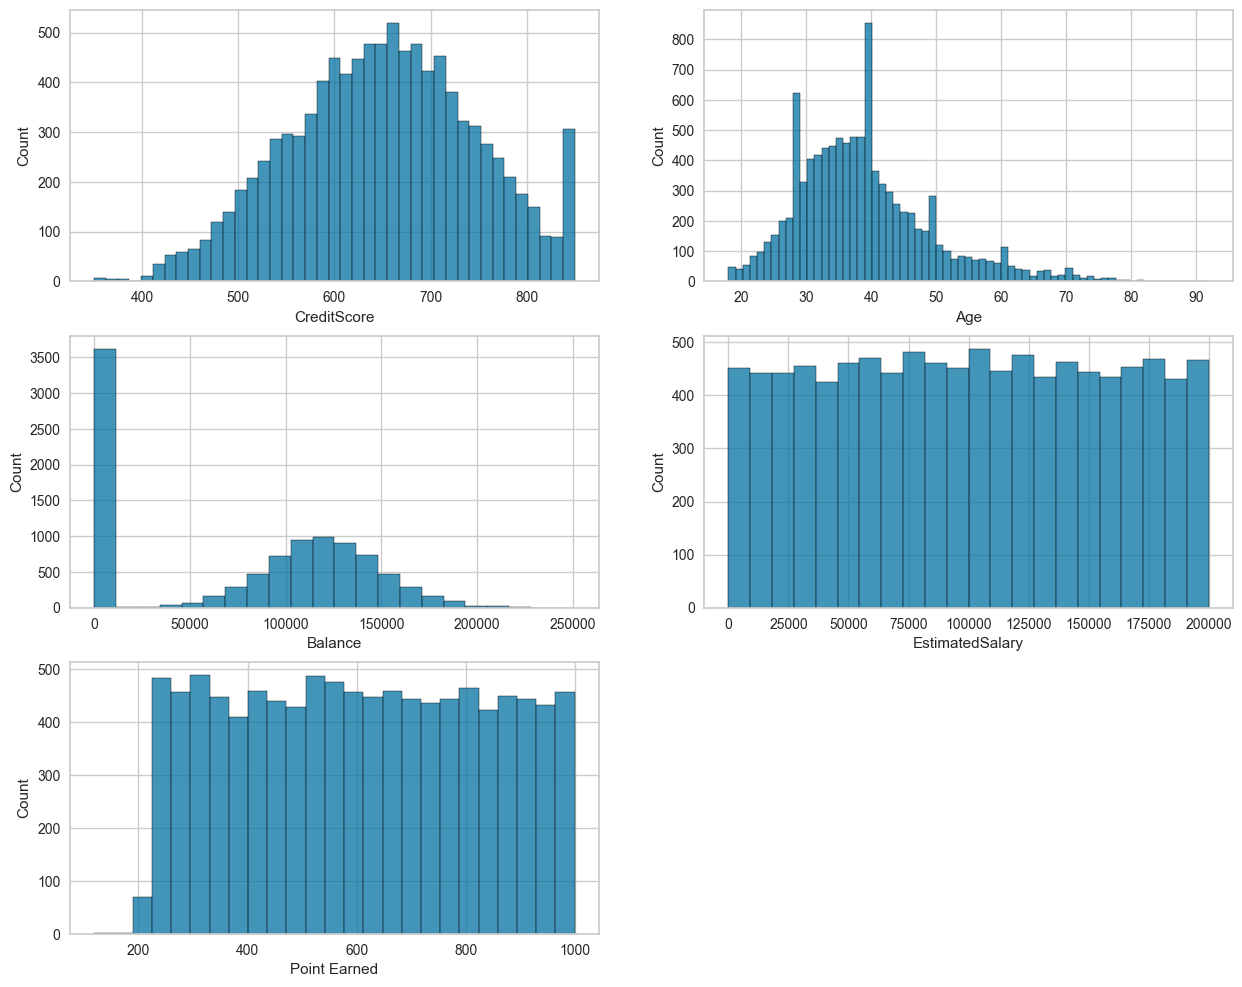

In [18]:
plt.figure(figsize = (15, 12))

plt.subplot(3, 2, 1)
sns.histplot(x = df_tr['CreditScore'], kde = False)

plt.subplot(3, 2, 2)
sns.histplot(x = df_tr['Age'], kde = False)

plt.subplot(3, 2, 3)
sns.histplot(x = df_tr['Balance'], kde = False)

plt.subplot(3, 2, 4)
sns.histplot(x = df_tr['EstimatedSalary'], kde = False)

plt.subplot(3, 2, 5)
sns.histplot(x = df_tr['Point Earned'], kde = False)

C:\Users\berke\AppData\Local\Temp\ipykernel_11996\2003618767.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Geography', palette = 'Set2', data = df_tr)
C:\Users\berke\AppData\Local\Temp\ipykernel_11996\2003618767.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Tenure', palette = 'Set2', data = df_tr)
C:\Users\berke\AppData\Local\Temp\ipykernel_11996\2003618767.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'NumOfProducts', palette = 'Set2', data = df_tr)
C:\Users\berke\AppData\Local\Temp\ipykernel_11996\20

<Axes: title={'center': 'Variable Card Type'}, xlabel='Card Type', ylabel='count'>

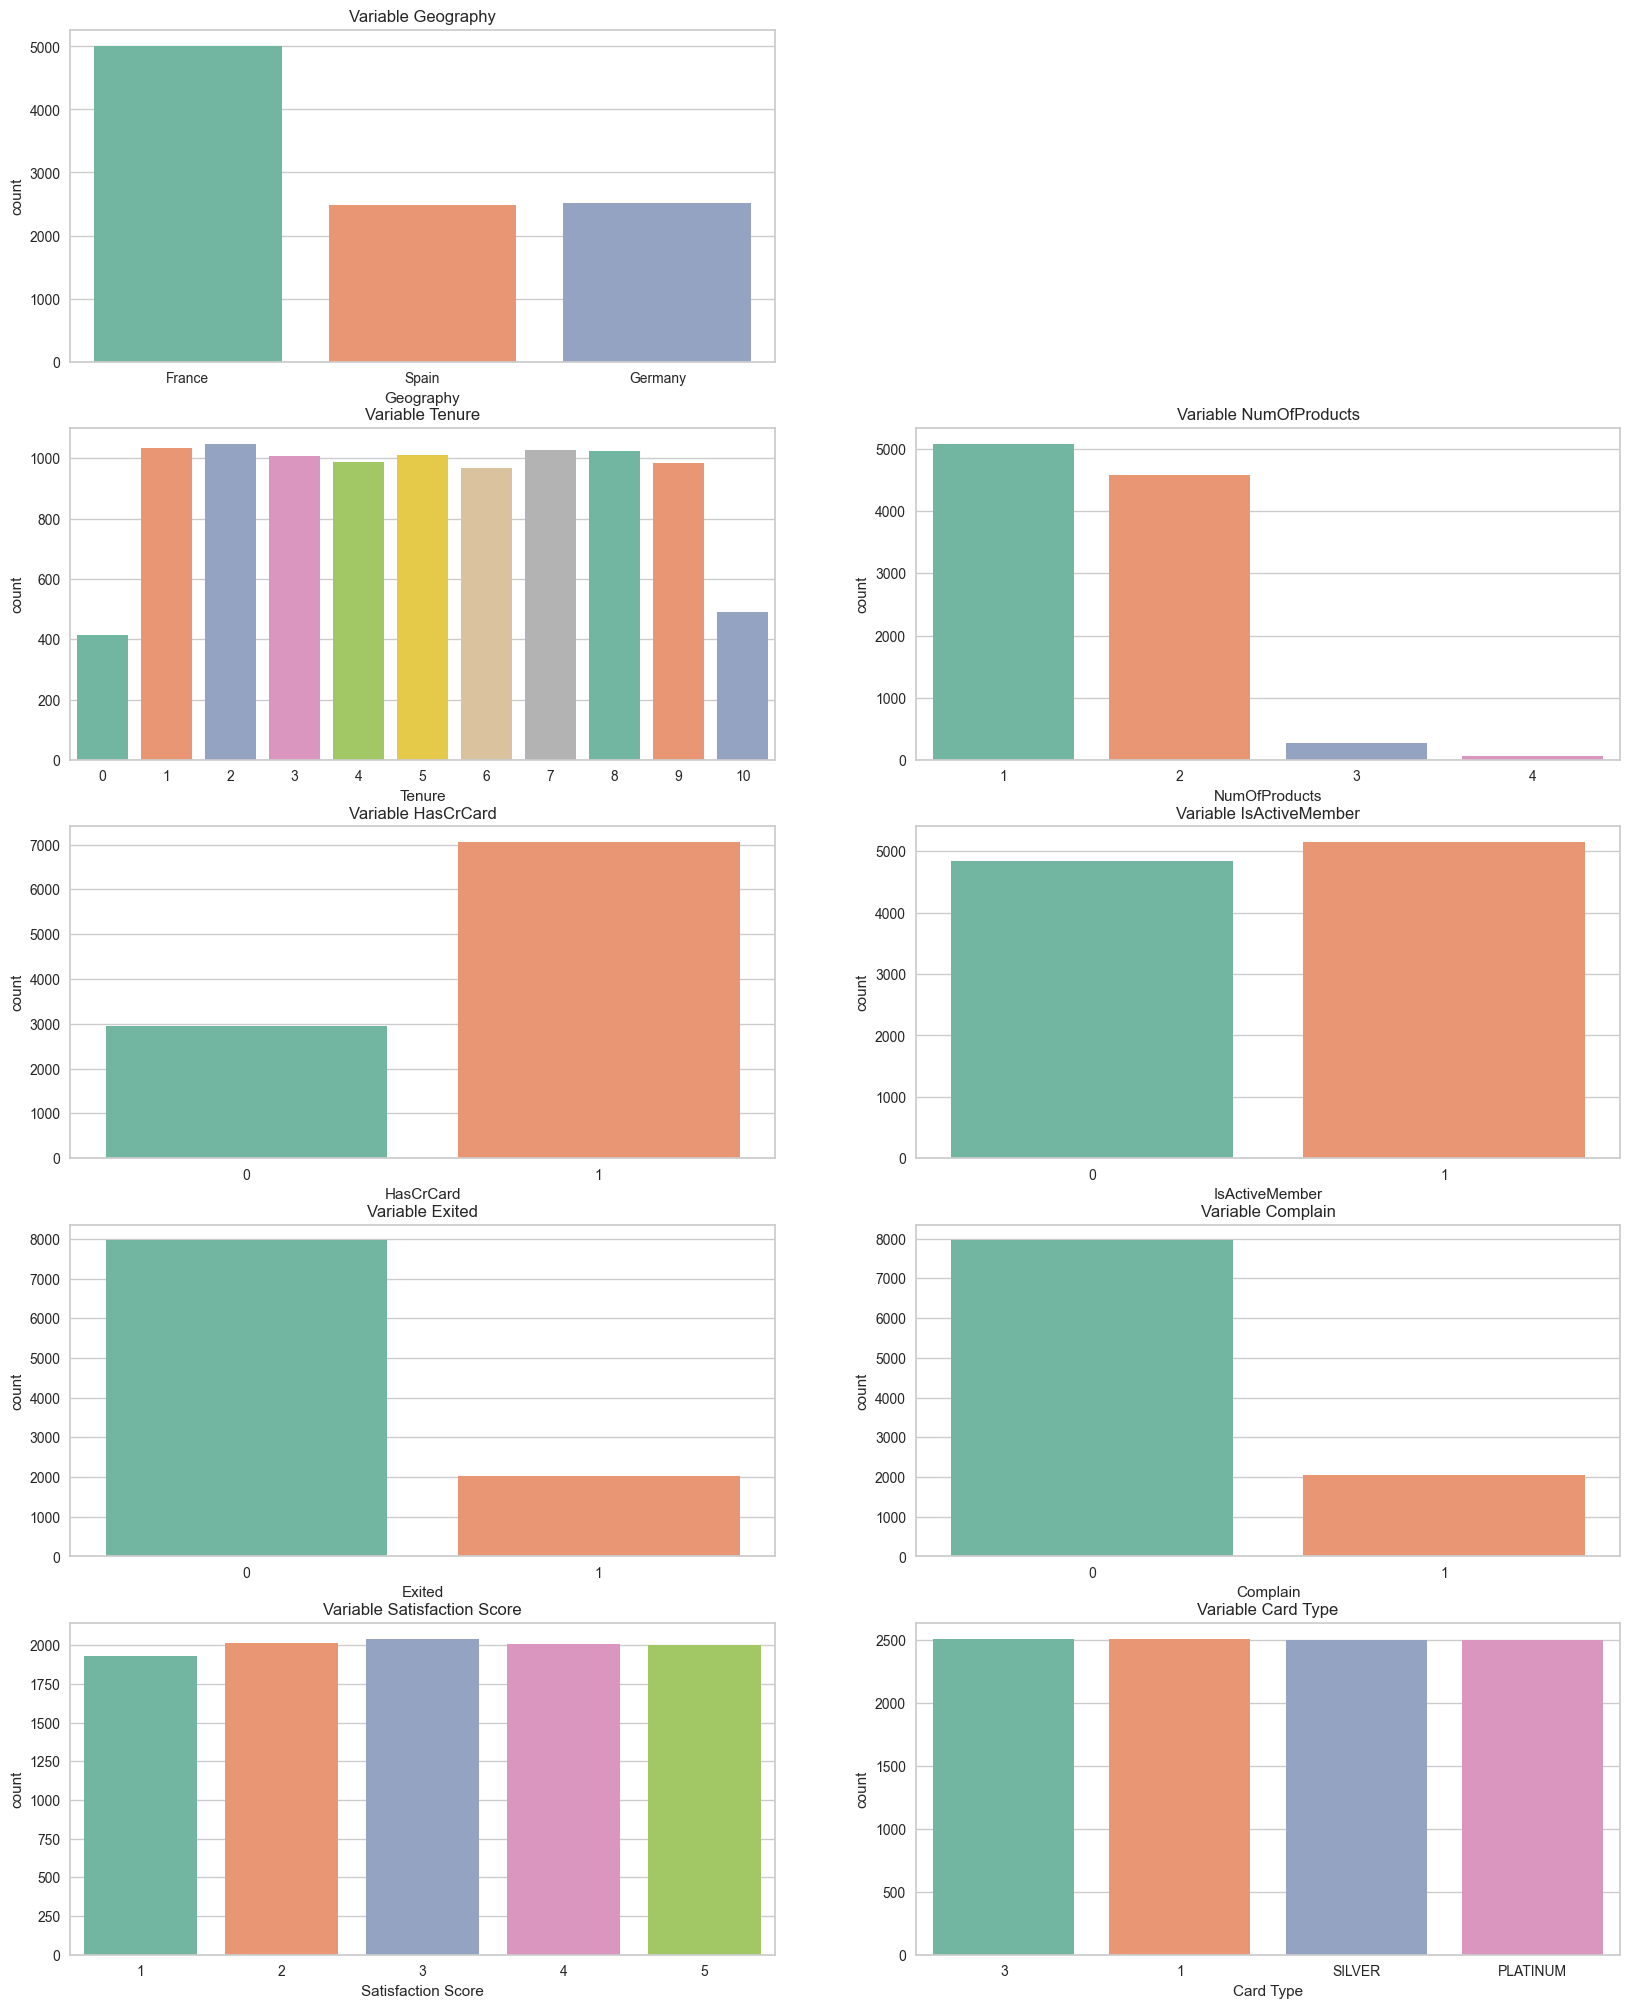

In [21]:
plt.figure(figsize = (20, 25))

plt.subplot(5, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', palette = 'Set2', data = df_tr)

#plt.subplot(5, 2, 2)
#plt.gca().set_title('Variable Gender')
#sns.countplot(x = 'Gender', palette = 'Set2', data = df_tr)

plt.subplot(5, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', palette = 'Set2', data = df_tr)

plt.subplot(5, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', palette = 'Set2', data = df_tr)

plt.subplot(5, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', palette = 'Set2', data = df_tr)

plt.subplot(5, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', palette = 'Set2', data = df_tr)

plt.subplot(5, 2, 7)
plt.gca().set_title('Variable Exited')
sns.countplot(x = 'Exited', palette = 'Set2', data = df_tr)

plt.subplot(5, 2, 8)
plt.gca().set_title('Variable Complain')
sns.countplot(x = 'Complain', palette = 'Set2', data = df_tr)

plt.subplot(5, 2, 9)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', palette = 'Set2', data = df_tr)

plt.subplot(5, 2, 10)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'Card Type', palette = 'Set2', data = df_tr)

<Axes: title={'center': 'Boxplot CreditScore'}, xlabel='CreditScore'>

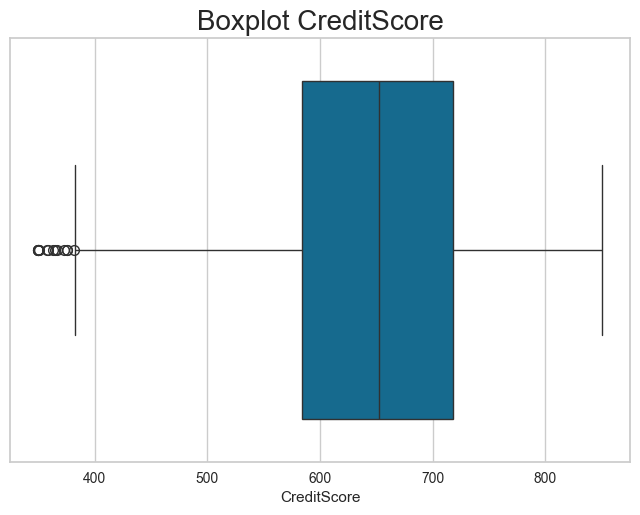

In [23]:
plt.title("Boxplot CreditScore", fontdict = {'fontsize': 20})
sns.boxplot(x=df_tr["CreditScore"])

<Axes: title={'center': 'Boxplot Age'}, xlabel='Age'>

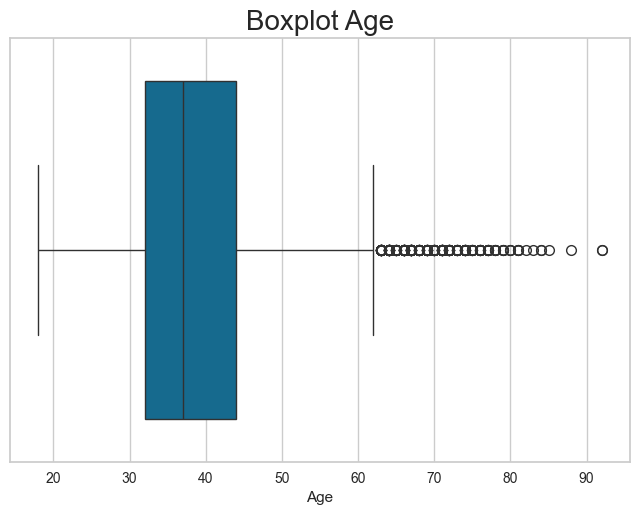

In [24]:
plt.title("Boxplot Age", fontdict = {'fontsize': 20})
sns.boxplot(x=df_tr["Age"])

<Axes: title={'center': 'Boxplot Balance'}, xlabel='Balance'>

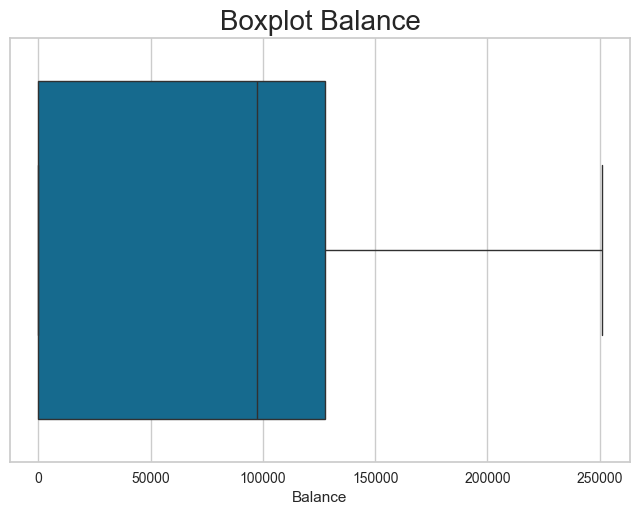

In [25]:
plt.title("Boxplot Balance", fontdict = {'fontsize': 20})
sns.boxplot(x=df_tr["Balance"])

<Axes: title={'center': 'Boxplot EstimatedSalary'}, xlabel='EstimatedSalary'>

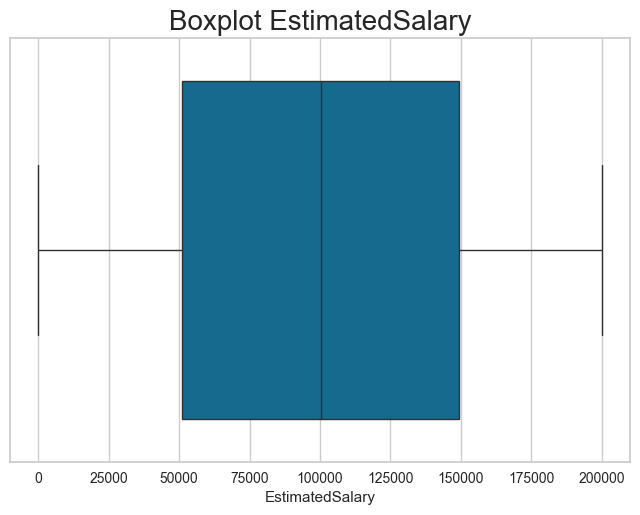

In [26]:
plt.title("Boxplot EstimatedSalary", fontdict = {'fontsize': 20})
sns.boxplot(x=df_tr["EstimatedSalary"])

<Axes: title={'center': 'Boxplot Point Earned'}, xlabel='Point Earned'>

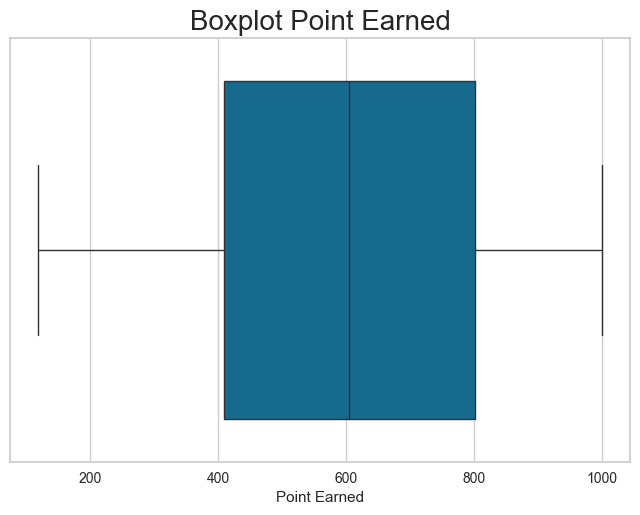

In [27]:
plt.title("Boxplot Point Earned", fontdict = {'fontsize': 20})
sns.boxplot(x=df_tr["Point Earned"])

<Axes: title={'center': 'Variable Card Type'}, xlabel='Card Type', ylabel='count'>

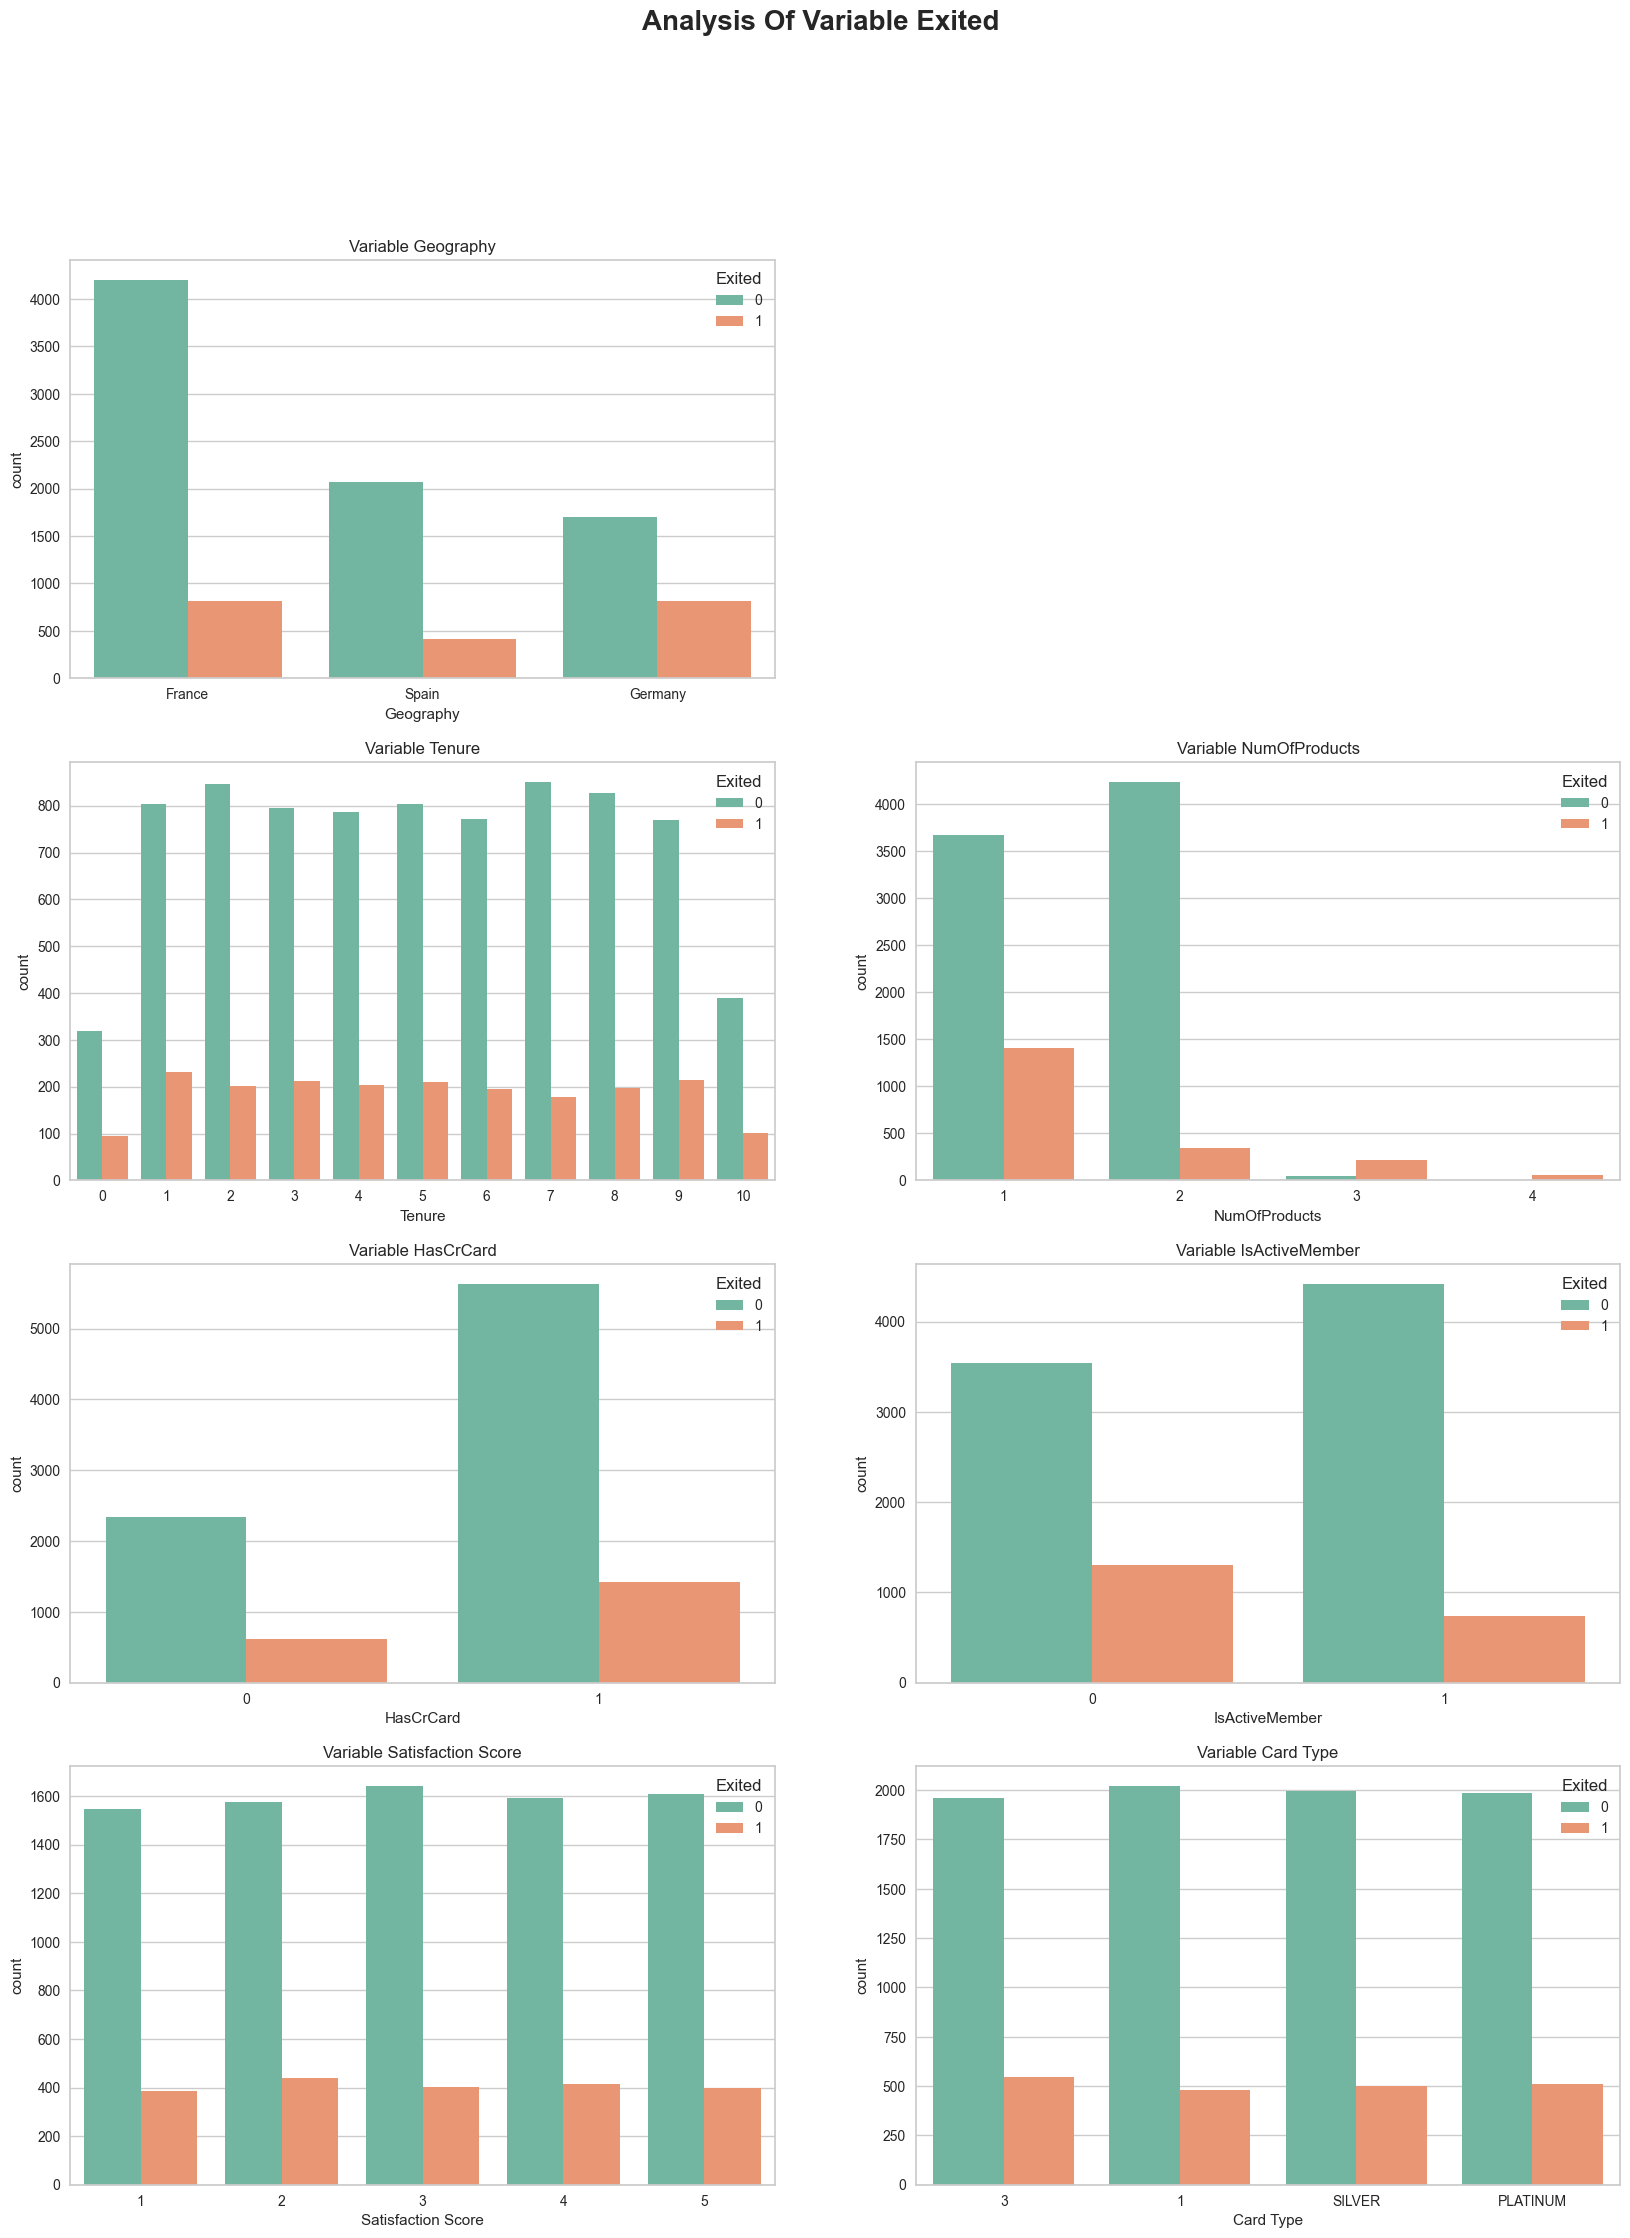

In [29]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Exited",fontweight="bold", fontsize=20)

plt.subplot(4, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', hue = 'Exited', palette = 'Set2', data = df_tr)

#plt.subplot(4, 2, 2)
#plt.gca().set_title('Variable Gender')
#sns.countplot(x = 'Gender', hue = 'Exited', palette = 'Set2', data = df_tr)

plt.subplot(4, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', hue = 'Exited', palette = 'Set2', data = df_tr)

plt.subplot(4, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', hue = 'Exited', palette = 'Set2', data = df_tr)

plt.subplot(4, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', hue = 'Exited', palette = 'Set2', data = df_tr)

plt.subplot(4, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', hue = 'Exited', palette = 'Set2', data = df_tr)

plt.subplot(4, 2, 7)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', hue = 'Exited', palette = 'Set2', data = df_tr)

plt.subplot(4, 2, 8)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'Card Type', hue = 'Exited', palette = 'Set2', data = df_tr)

<Axes: xlabel='Exited', ylabel='Point Earned'>

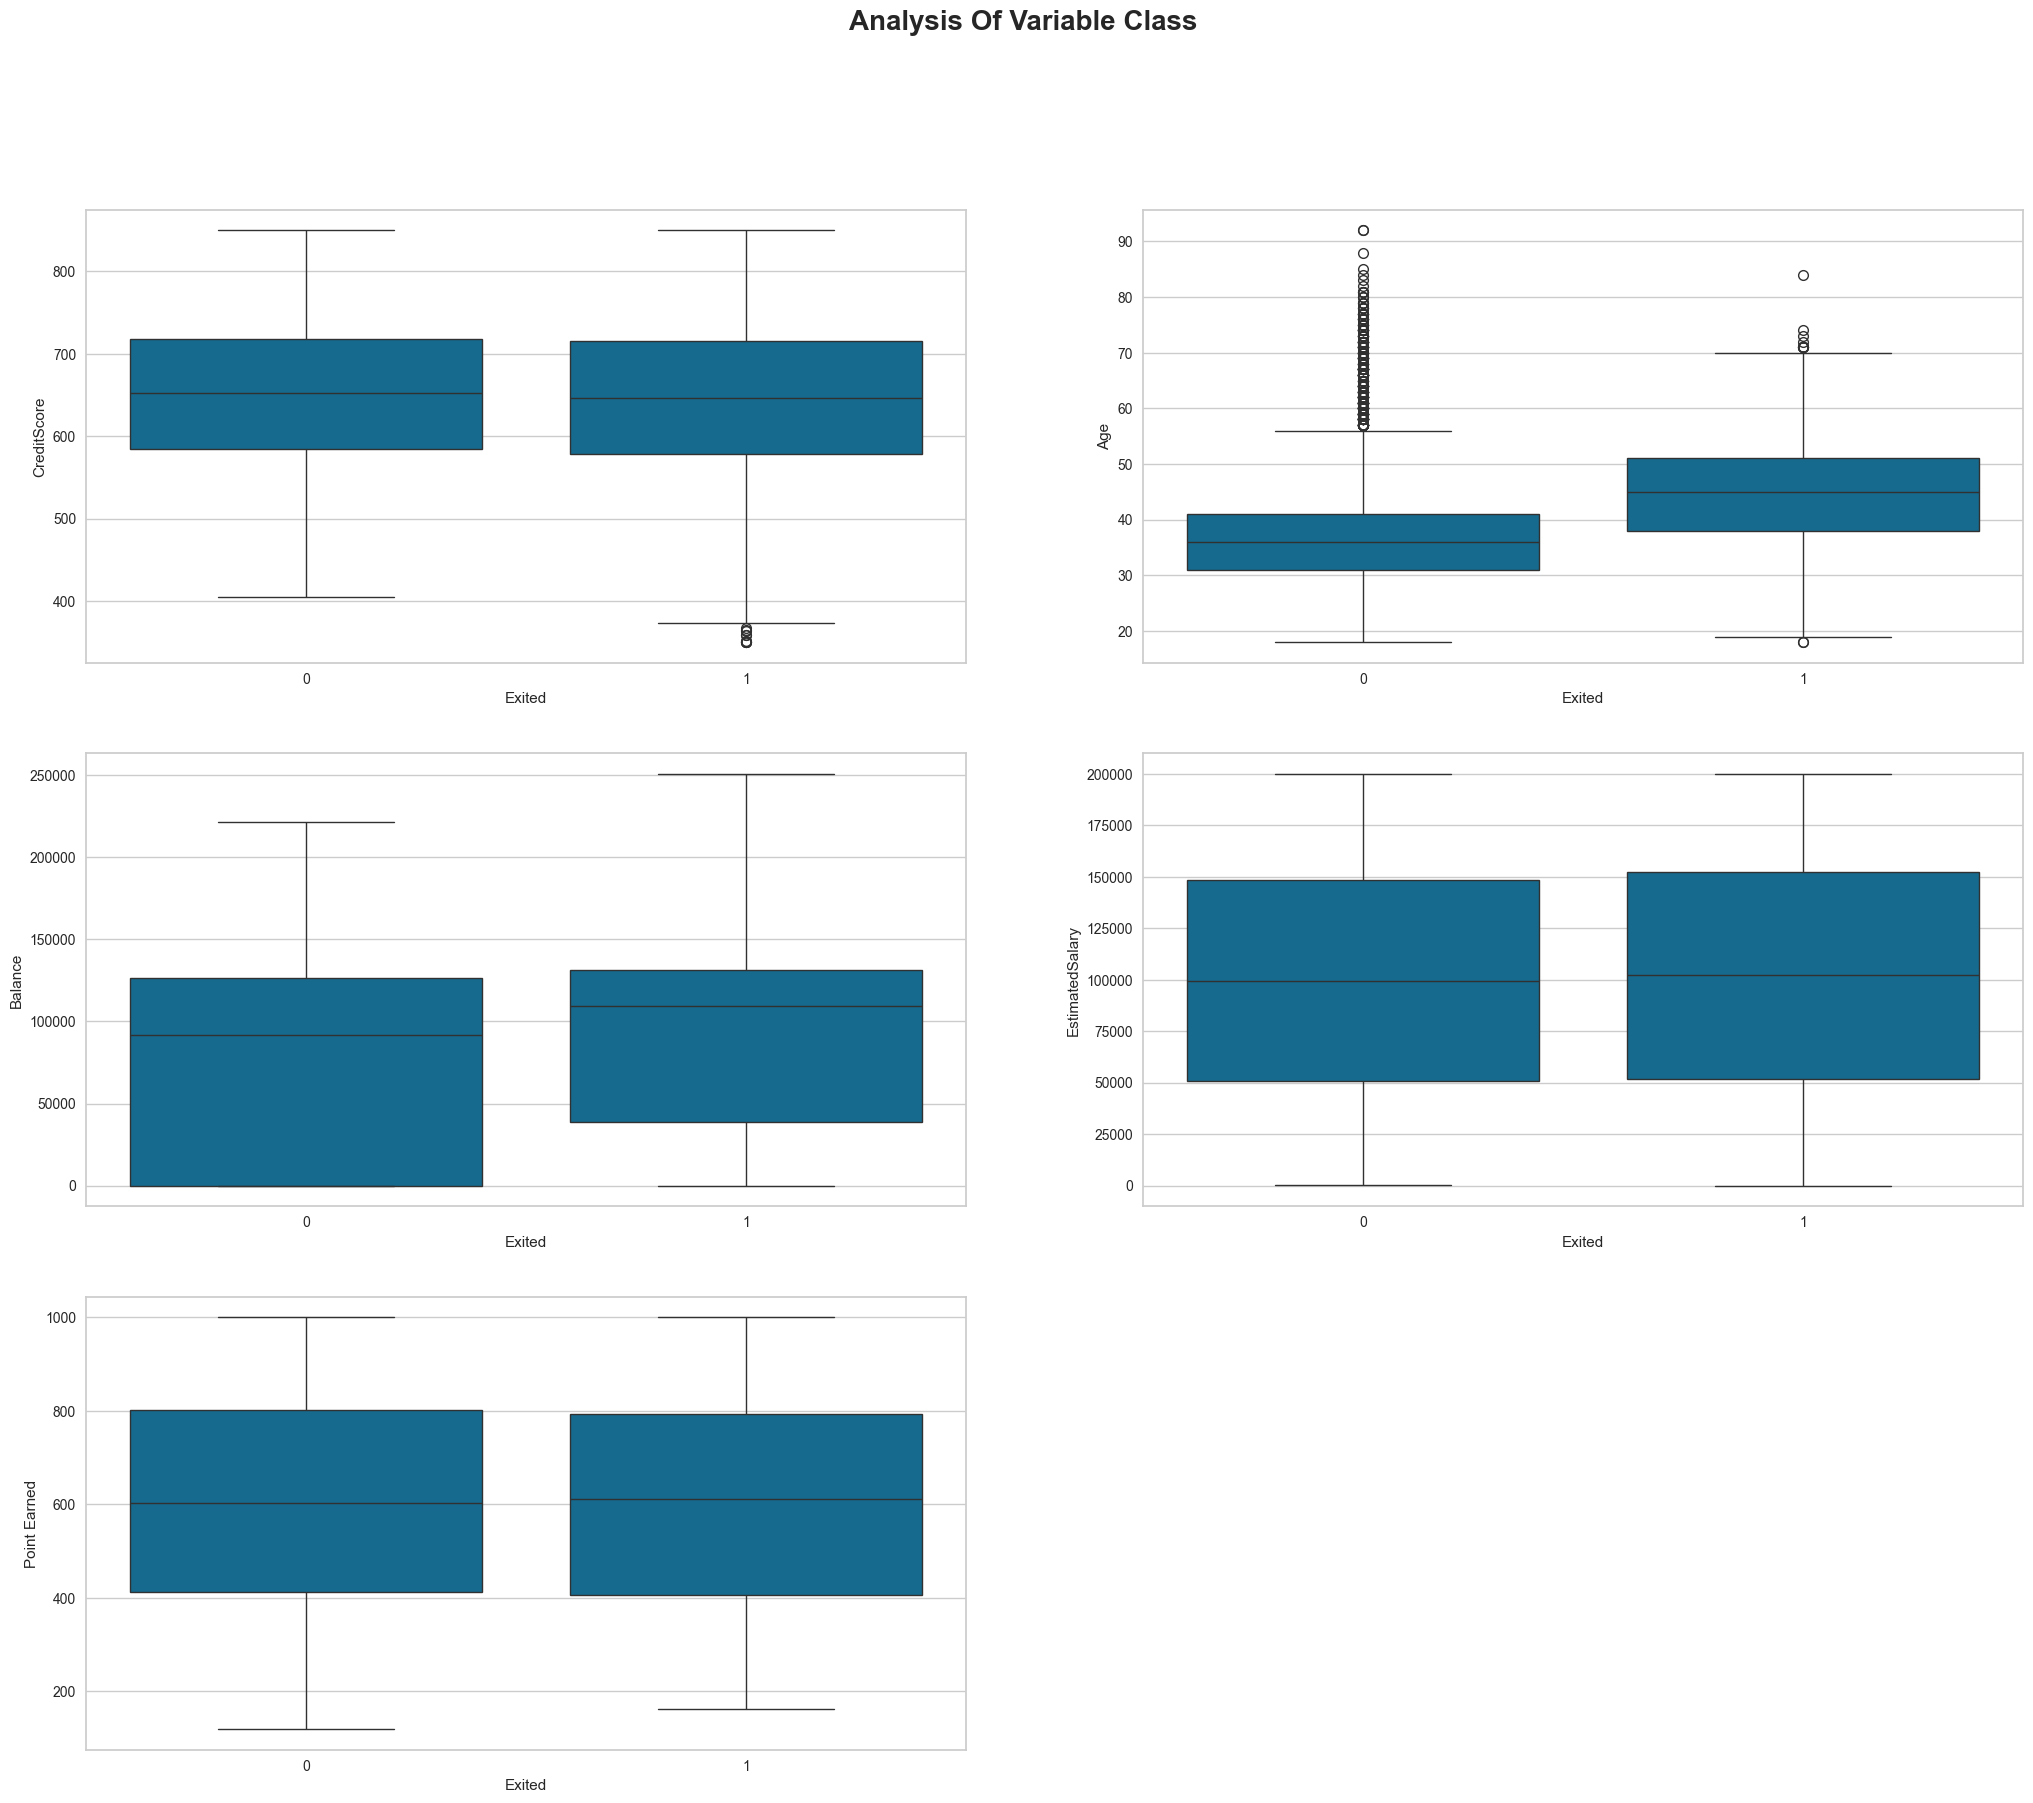

In [30]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Class",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="Exited", y="CreditScore", data=df_tr)

plt.subplot(3,2,2)
sns.boxplot(x="Exited", y="Age", data=df_tr)

plt.subplot(3,2,3)
sns.boxplot(x="Exited", y="Balance", data=df_tr)

plt.subplot(3,2,4)
sns.boxplot(x="Exited", y="EstimatedSalary", data=df_tr)

plt.subplot(3,2,5)
sns.boxplot(x="Exited", y="Point Earned", data=df_tr)